In [131]:
import pandas as pd                            ### importing all the necessary library to the python environment.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

In [132]:
df = pd.read_csv('/content/diamonds_new (1).csv') ### read the csv file to the notebook.

In [133]:
df.head() ### read the first 5 lines

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [134]:
df.tail() ### read the last 5 lines of the data

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [135]:
df.columns ### different types of columns available in the data

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [136]:
df.shape ### gives the shape (number of rows and number of columns) of the data

(53940, 9)

In [137]:
df.info() ### datatypes of the columns available in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [138]:
df.isna() ## checking is there is any missing values present the data frame

,carat,cut,color,clarity,table,x,y,z,price_new
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False


In [139]:
df.isna().sum() ### it gives the total number of missing values present in each column of the data frame

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [140]:
df.isna().sum() / df.shape[0] *100 ###this step is to check the percentage of missing values,if it is more than 10% or 15% drop that column.


carat        0.183537
cut          0.000000
color        0.103819
clarity      0.000000
table        0.116796
x            0.000000
y            0.000000
z            0.000000
price_new    0.000000
dtype: float64

In [141]:
### in order to handle the missing values we have to plot its distribution.
### if the data is numerical and have a symmetrical distribution,fill it with the mean
### if the data has skewed distribution fill it with median
## if the data is categorical fill it with mode
### here we have 2 numerical(carat and table) and 1 categorical data(color)

In [142]:
df['carat'] ### gives the values on this particular column

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

plotting the histogram of carat to get its distribution

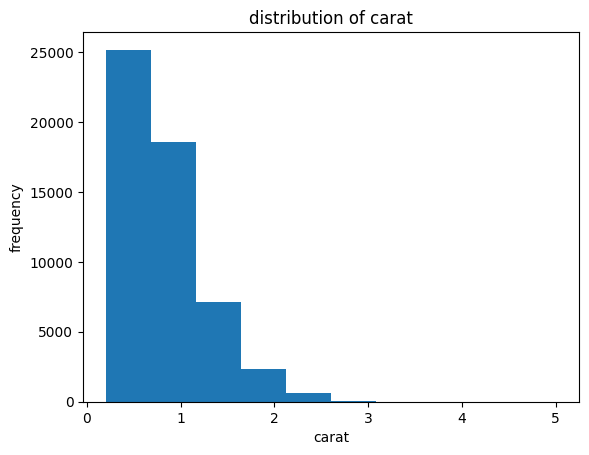

In [143]:
plt.hist(df['carat'])
plt.title("distribution of carat")
plt.xlabel("carat")
plt.ylabel('frequency')
plt.show()

In [144]:
## here we can see that the distribution is positively skewed

In [145]:
df['carat'].describe()

count    53841.000000
mean         0.798120
std          0.474428
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [146]:
median_carat = df['carat'].median() ## here the distribution is positively skewed,so fill it with the median
df['carat'] = df['carat'].fillna(median_carat)


In [147]:
df.isna().sum() ## checking again the missing values to check whether the 'carat' column is filled.

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [148]:
## color is categorical.... fill it with mode
df['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [149]:
df['color'].value_counts() ### gives how many times each value is repeating

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [150]:
df['color'] = df['color'].fillna("G") ###  fill it with mostly occuring value "G"

In [151]:
df.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

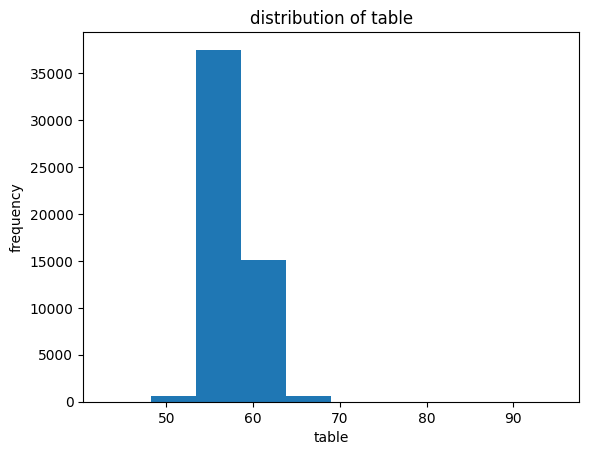

In [152]:
plt.hist(df['table'])
plt.title("distribution of table")
plt.xlabel('table')
plt.ylabel('frequency')
plt.show()

In [153]:
df['table'].describe()

count    53877.000000
mean        57.457719
std          2.235742
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [154]:
### here the distribution is  approximately normal,so fill it with mean(not much differecne between mean and median)

In [155]:
mean_table = df['table'].mean()
df['table'] = df['table'].fillna(mean_table)


In [156]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

Now,Lets check for outliers, for that we have to plot its boxplot

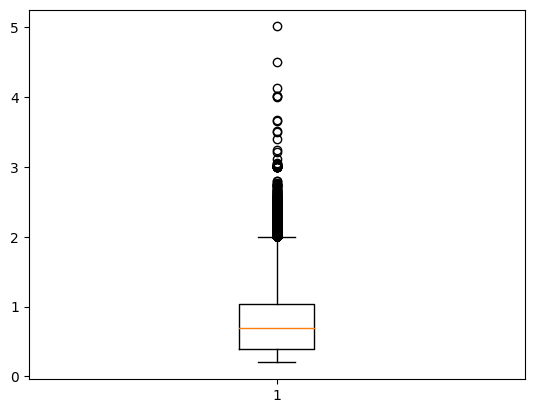

In [157]:
plt.boxplot(df['carat'])
plt.show()

Outliers are handled by different transformations such as square root transformation,logarithemic transformation,z score transformation and the IQR transformation.

In [158]:
df['sqr_carat'] = df['carat'] ** 0.5  ### here we are taking the square root of the particular column inorder to handle the outliers

In [159]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,sqr_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362


In [160]:
df['carat'].skew() ,df['sqr_carat'].skew()  ### Comparing the skewness of the original data and the transformed data

(1.116645920812613, 0.5484712238526284)

In [161]:
df['carat'].kurtosis() , df['sqr_carat'].kurtosis()  ###  Comparing the kurtosis of the original data and the transformed data

(1.2566353326079294, -0.43201768591313217)

here we can see that the both skewness and kurtosis  is reduced after square root transformation

In [162]:
### let's do the logarithemic transformation too to check which transformation is best.

In [163]:
df['log_carat'] = np.log(df['carat'])

In [164]:
df['carat'].skew() , df['log_carat'].skew()

(1.116645920812613, 0.09610299234720034)

In [165]:
df['carat'].kurtosis() , df['log_carat'].kurtosis()

(1.2566353326079294, -1.0648855504725978)

here also we can see that the both skewness and kurtosis  is reduced after log transformation

In [166]:
#### lets plot its distributions ie, 'carat','log_carat' and 'sqr_carat'.

<ipython-input-167-63ae49f4616f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['carat'], ax = axes[0])
<ipython-input-167-63ae49f4616f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['log_carat'], ax = axes[1])
<ipython-input-167-63ae49f4616f>:4: UserWarning: 

`distplot` is a deprecate

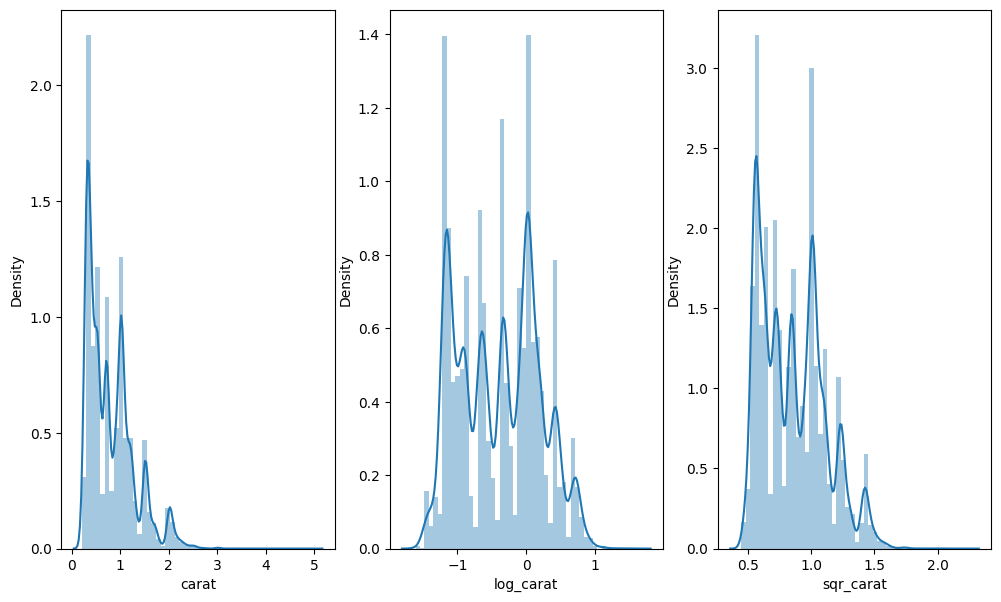

In [167]:
fig, axes = plt.subplots(1,3, figsize = (12,7))
sn.distplot(df['carat'], ax = axes[0])
sn.distplot(df['log_carat'], ax = axes[1])
sn.distplot(df['sqr_carat'], ax = axes[2])
plt.show();

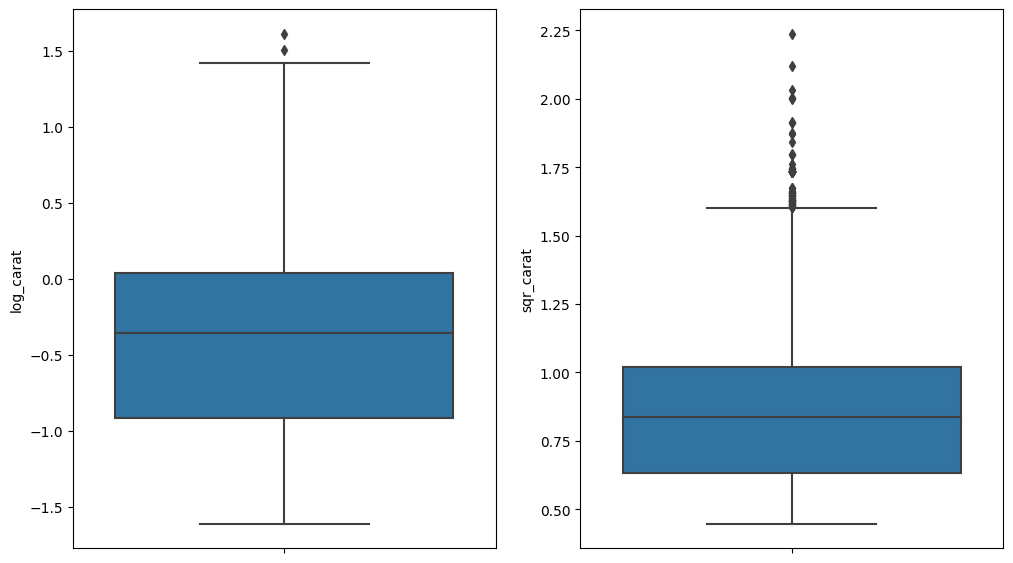

In [168]:
fig, axes = plt.subplots(1,2, figsize = (12,7))
sn.boxplot(y=df['log_carat'], ax = axes[0])
sn.boxplot(y=df['sqr_carat'], ax = axes[1])
plt.show()

In [169]:
## as we can see that the outliers are removed in log transformation

In [170]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new,sqr_carat,log_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,-1.469676
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,-1.560648
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583,-1.469676
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,-1.237874
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,-1.171183


In [171]:
### now lets check the outliers present in the 'table',we plot its boxplot

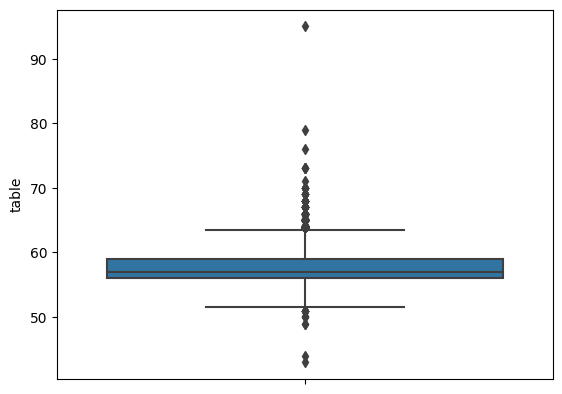

In [172]:
sn.boxplot(y= df['table'])
plt.show()

z score transformation

In [173]:
df['zt'] = stats.zscore(df['table'])


In [174]:
df = df.drop(df[(df['zt'] < -3) | (df['zt'] > 3)].index ) ### all the values above 3 standard deviations and below -3 standard deviations are outliers 
                                                           ### and can be removed

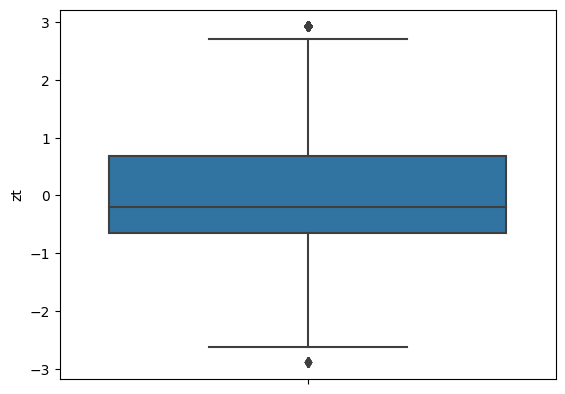

In [175]:
sn.boxplot(y = df['zt'])
plt.show()

In [176]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new,sqr_carat,log_carat,zt
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,-1.469676,-1.099938
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,-1.560648,1.585328
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,-1.237874,0.242695
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,-1.171183,0.242695
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0,0.489898,-1.427116,-0.204849


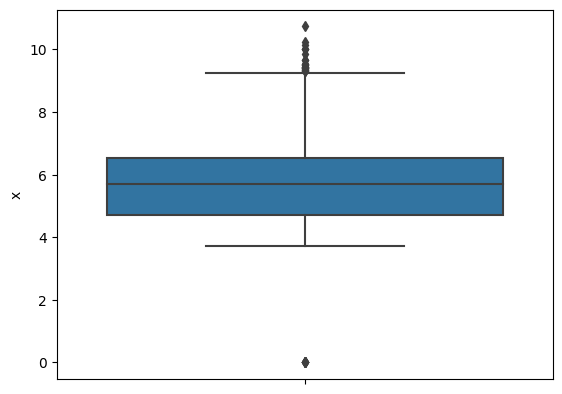

In [177]:
sn.boxplot(y = df['x'])
plt.show()

to remove the outliers present in the x,y and z variables let's choose IQR transformation

In [178]:
df['x'].describe()

count    53604.000000
mean         5.728401
std          1.121417
min          0.000000
25%          4.710000
50%          5.690000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [179]:
Q1_X = 4.71     
Q2_X = 5.69
Q3_X = 6.54

In [180]:
IQR_X = Q3_X - Q1_X
LC_X = (Q1_X - 1.5* IQR_X)  # Q1_X - 1.5 * IQR_X  ### lower boundary
UC_X = (Q3_X + 1.5* IQR_X)  # Q3_X + 1.5 * IQR_X  ### upper boundary
print(LC_X,UC_X)

1.9649999999999999 9.285


In [181]:
df[(df['x'] < LC_X) | (df['x'] > UC_X)].index ## finding the index of the values that lie below lower boundery and that lies above upper boundary

Int64Index([11182, 11963, 22741, 22831, 23644, 24131, 24297, 24328, 24520,
            24816, 25460, 25850, 25998, 25999, 26243, 26431, 26444, 26534,
            26932, 27130, 27415, 27429, 27514, 27630, 27638, 27649, 27679,
            27684, 27685, 49556, 49557],
           dtype='int64')

In [182]:
df = df.drop([11182, 11963, 16283, 21862, 22428, 22741, 22831, 23580, 23644,  ## these are considered to be outliers,so drop that rows.
            24131, 24297, 24328, 24520, 24816, 25460, 25850, 25998, 25999,
            26243, 26431, 26444, 26467, 26534, 26932, 27130, 27415, 27429,
            27514, 27630, 27638, 27649, 27679, 27684, 27685, 49556, 49557])

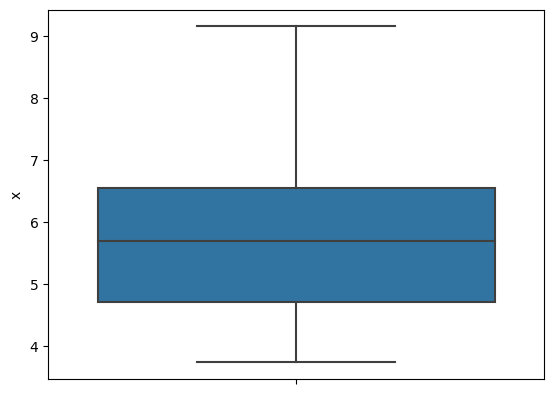

In [183]:
sn.boxplot(y = df['x'])
plt.show()

here we can see that the outliers are removed, so repeat these IQR for the 'y' and 'x' columns.

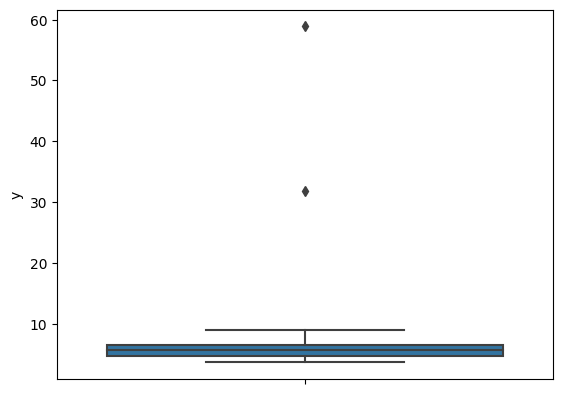

In [184]:
sn.boxplot(y = df['y'])
plt.show()

In [185]:
df['y'].describe()

count    53568.000000
mean         5.730773
std          1.137585
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [186]:
Q1_y= 4.72
Q2_y = 5.71
Q3_y = 6.54

In [187]:
IQR_y = Q3_y - Q1_y
LC_y = (Q1_y - 1.5* IQR_y)
UC_y = (Q3_y + 1.5* IQR_y)
print(LC_y,UC_y)

1.9899999999999993 9.27


In [188]:
df[(df['y'] < LC_y) | (df['y'] > UC_y)].index

Int64Index([24067, 49189], dtype='int64')

In [189]:
df = df.drop([24067, 49189])

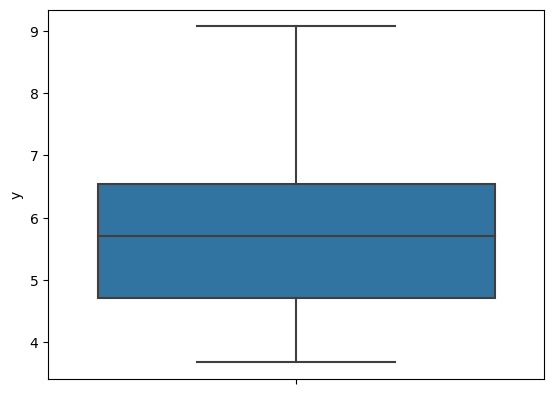

In [190]:
sn.boxplot(y = df['y'])
plt.show()

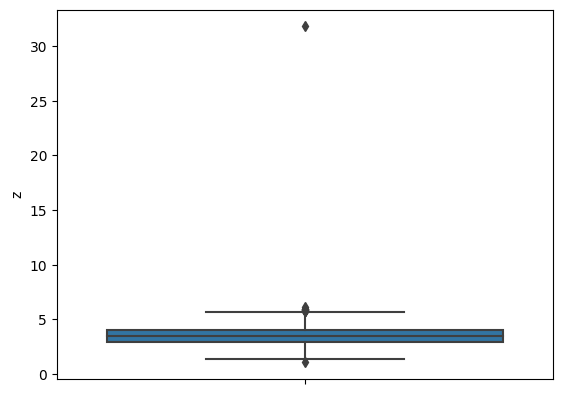

In [191]:
sn.boxplot(y = df['z'])
plt.show()

In [192]:
df['z'].describe()

count    53566.000000
mean         3.537918
std          0.700755
min          1.070000
25%          2.910000
50%          3.520000
75%          4.030000
max         31.800000
Name: z, dtype: float64

In [193]:
Q1_z= 2.91
Q2_z = 3.52
Q3_z = 4.03
IQR_z = Q3_z - Q1_z
LC_z = (Q1_z - 1.5* IQR_z)
UC_z = (Q3_z + 1.5* IQR_z)
print(LC_z,UC_z)


1.23 5.710000000000001


In [194]:
df[(df['z'] < LC_z) | (df['z'] > UC_z)].index

Int64Index([14635, 17196, 19346, 21758, 22540, 26100, 26194, 26744, 26933,
            27515, 27516, 27517, 27518, 48410],
           dtype='int64')

In [195]:
df = df.drop([14635, 17196, 19346, 21758, 22540, 26100, 26194, 26744, 26933,
            27515, 27516, 27517, 27518, 48410])

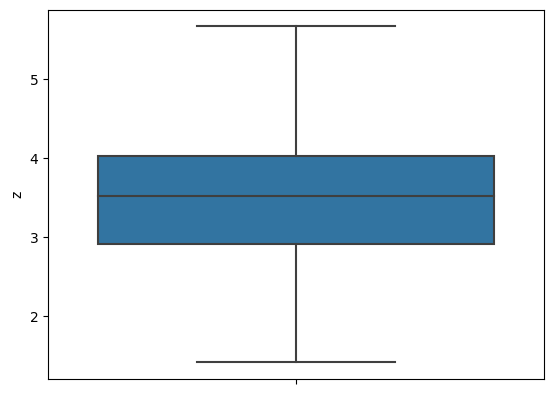

In [196]:
sn.boxplot(y = df['z'])
plt.show()

In [197]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new,sqr_carat,log_carat,zt
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,-1.469676,-1.099938
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,-1.560648,1.585328
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,-1.237874,0.242695
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,-1.171183,0.242695
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0,0.489898,-1.427116,-0.204849


In [198]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'sqr_carat', 'log_carat', 'zt'],
      dtype='object')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53552 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53552 non-null  float64
 1   cut        53552 non-null  object 
 2   color      53552 non-null  object 
 3   clarity    53552 non-null  object 
 4   table      53552 non-null  float64
 5   x          53552 non-null  float64
 6   y          53552 non-null  float64
 7   z          53552 non-null  float64
 8   price_new  53552 non-null  float64
 9   sqr_carat  53552 non-null  float64
 10  log_carat  53552 non-null  float64
 11  zt         53552 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.3+ MB


encoding the categorical variable

In [200]:
## cut,color,clarity are the categorical variables here ###### there are two types of encoding
## label encoding & one hot encoding 

In [201]:
### we can choose label encoding for cut but in order to choose it manually we maps 0,1,2,3,4 for fair,good,very good ,premium and ideal respectively.
### for that we use dictionary function

In [202]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [203]:
dic1 = {"Ideal" : 4, "Premium" : 3, "Good":1, "Very Good" : 2, "Fair" :0}

In [204]:
df['cut'] = df['cut'].map(dic1)

In [205]:
## to perfom encoding we need to seperate independant and dependant variable,let's choose price_new as independent variable.

In [206]:
req_col = ['cut', 'color', 'clarity', 'x', 'y', 'z',
       'log_carat','zt']                                ### these are the required columns.

In [207]:
df[req_col]

,cut,color,clarity,x,y,z,log_carat,zt
0,4,E,SI2,3.95,3.98,2.43,-1.469676,-1.099938
1,3,E,SI1,3.89,3.84,2.31,-1.560648,1.585328
3,3,I,VS2,4.20,4.23,2.63,-1.237874,0.242695
4,1,J,SI2,4.34,4.35,2.75,-1.171183,0.242695
5,2,J,VVS2,3.94,3.96,2.48,-1.427116,-0.204849
...,...,...,...,...,...,...,...,...
53935,4,D,SI1,5.75,5.76,3.50,-0.328504,-0.204849
53936,1,D,SI1,5.69,5.75,3.61,-0.328504,-1.099938
53937,2,D,SI1,5.66,5.68,3.56,-0.356675,1.137784
53938,3,H,SI2,6.15,6.12,3.74,-0.150823,0.242695


In [208]:
X = df [req_col]
Y = df['price_new']

In [209]:
### encoding

In [210]:
X['color'].unique()        ### it returns the unique values present in the column 'color'

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [211]:
X['clarity'].unique()      ### it returns the unique values present in the column 'clarity'

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [212]:
X = pd.get_dummies(X)     ### 'pd.get_dummies(X)' is a function that performs one-hot encoding on the categorical variables in the data frame.
                          #### it creates new columns in the DataFrame or Series X, one for each unique value in the categorical variables. 
                          ### For each row, the value in the new column is set to 1 if the original categorical variable had that value, and 0 otherwise.

In [213]:
X.columns

Index(['cut', 'x', 'y', 'z', 'log_carat', 'zt', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [214]:
X

,cut,x,y,z,log_carat,zt,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4,3.95,3.98,2.43,-1.469676,-1.099938,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,3.89,3.84,2.31,-1.560648,1.585328,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4.20,4.23,2.63,-1.237874,0.242695,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,4.34,4.35,2.75,-1.171183,0.242695,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,2,3.94,3.96,2.48,-1.427116,-0.204849,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,4,5.75,5.76,3.50,-0.328504,-0.204849,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,1,5.69,5.75,3.61,-0.328504,-1.099938,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,2,5.66,5.68,3.56,-0.356675,1.137784,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,3,6.15,6.12,3.74,-0.150823,0.242695,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [215]:
### scaling (scaling brings all variables to a common scale)

In [216]:
X.describe()

,cut,x,y,z,log_carat,zt,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,...,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000
mean,2.920451,5.726317,5.728596,3.536914,-0.397575,-0.023836,0.125747,0.181711,0.176781,0.209759,...,0.100183,0.051875,0.013165,0.033388,0.242512,0.169723,0.151386,0.227592,0.068009,0.094226
std,1.101072,1.115347,1.107619,0.689153,0.583665,0.949061,0.331567,0.385610,0.381487,0.407140,...,0.300247,0.221776,0.113981,0.179650,0.428606,0.375393,0.358428,0.419282,0.251763,0.292146
min,0.000000,3.730000,3.680000,1.410000,-1.609438,-2.890116,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.710000,4.720000,2.910000,-0.916291,-0.652394,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.690000,5.710000,3.520000,-0.356675,-0.204849,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,6.540000,6.532500,4.030000,0.039221,0.690239,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,9.130000,9.070000,5.670000,1.101940,2.927961,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
## min max scaling and standard scaling are there

In [218]:
from sklearn.preprocessing import MinMaxScaler   ### The MinMaxScaler class from the sklearn.preprocessing module in Python's scikit-learn library 
mn = MinMaxScaler()                              ### performs min-max scaling on the input data.


In [219]:
from sklearn.model_selection import train_test_split ### this function used for splitting a dataset into two separate sets,
                                                     ### one for training a machine learning model and one for testing the model's performance.
                                                    ### 80% is trained 20% data is tested/validate data

In [220]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 134)

In [221]:
X_train.shape, Y_train.shape

((42841, 21), (42841,))

In [222]:
X_test.shape, Y_test.shape

((10711, 21), (10711,))

In [223]:
X_train = mn.fit_transform(X_train)   ### scaling is performed for both trained and tested data
X_test = mn.fit_transform(X_test)

In [224]:
X_train [1]

array([1.        , 0.58518519, 0.59701493, 0.64788732, 0.65774349,
       0.30769231, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        ])

In [225]:
X_test [1]

array([0.5       , 0.49245283, 0.50943396, 0.54647887, 0.60985333,
       0.30769231, 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])